<a href="https://colab.research.google.com/github/oldgreg07/Journey-to-the-Center-of-Python/blob/main/Data_Visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

df = pd.read_csv(https://raw.githubusercontent.com/fantasydatapros/LearnPythonWithFantasyFootball/master/2022/07-Data%20Visualizations/03-Yearly%20Fantasy%20Stats%20-%202021.csv)

In [5]:
import pandas as pd; pd.set_option('display.max_columns', None)
import seaborn as sns
from matplotlib import pyplot as plt

In [6]:
df = pd.read_csv('https://raw.githubusercontent.com/fantasydatapros/LearnPythonWithFantasyFootball/master/2022/07-Data%20Visualizations/03-Yearly%20Fantasy%20Stats%20-%202021.csv').iloc[:, 1:]

df.head()

,Player,Tm,Pos,Age,G,GS,Tgt,Rec,PassingYds,PassingTD,PassingAtt,RushingYds,RushingTD,RushingAtt,ReceivingYds,ReceivingTD,FantasyPoints,Int,Fumbles,FumblesLost
0,Jonathan Taylor*+,IND,RB,22,17,17,51.0,40.0,0.0,0.0,0.0,1811.0,18.0,332.0,360.0,2.0,333.0,0.0,4.0,2.0
1,Cooper Kupp*+,LAR,WR,28,17,17,191.0,145.0,0.0,0.0,1.0,18.0,0.0,4.0,1947.0,16.0,295.0,0.0,0.0,0.0
2,Deebo Samuel*+,SFO,WR,25,16,15,121.0,77.0,24.0,1.0,2.0,365.0,8.0,59.0,1405.0,6.0,262.0,0.0,4.0,2.0
3,Josh Allen,BUF,QB,25,17,17,0.0,0.0,4407.0,36.0,646.0,763.0,6.0,122.0,0.0,0.0,403.0,15.0,8.0,3.0
4,Austin Ekeler,LAC,RB,26,16,16,94.0,70.0,0.0,0.0,0.0,911.0,12.0,206.0,647.0,8.0,274.0,0.0,4.0,3.0


In [7]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 671 entries, 0 to 670
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Player         671 non-null    object 
 1   Tm             671 non-null    object 
 2   Pos            596 non-null    object 
 3   Age            671 non-null    int64  
 4   G              671 non-null    int64  
 5   GS             671 non-null    int64  
 6   Tgt            670 non-null    float64
 7   Rec            670 non-null    float64
 8   PassingYds     670 non-null    float64
 9   PassingTD      670 non-null    float64
 10  PassingAtt     670 non-null    float64
 11  RushingYds     670 non-null    float64
 12  RushingTD      670 non-null    float64
 13  RushingAtt     670 non-null    float64
 14  ReceivingYds   670 non-null    float64
 15  ReceivingTD    670 non-null    float64
 16  FantasyPoints  581 non-null    float64
 17  Int            670 non-null    float64
 18  Fumbles   

In [8]:
pd.set_option('chained_assignment', None)

In [9]:
fantasy_scoring_weights = {
    'RushingYds': 0.1,
    'ReceivingYds': 0.1,
    'RushingTD': 6,
    'ReceivingTD': 6,
    'FumblesLost': -2,
    'Rec': 1, # Scoring set for PPR leagues
}

rb_df = df.loc[df['Pos'] == 'RB']

def get_fantasy_points(row):
  g = row['G']

  fantasy_points = sum(
      [row[column]*weight for column, weight in fantasy_scoring_weights.items()]
  )

  return fantasy_points / g

rb_df['FantasyPoints/G'] = rb_df.apply(get_fantasy_points, axis=1)

In [10]:
rb_df.head()

,Player,Tm,Pos,Age,G,GS,Tgt,Rec,PassingYds,PassingTD,PassingAtt,RushingYds,RushingTD,RushingAtt,ReceivingYds,ReceivingTD,FantasyPoints,Int,Fumbles,FumblesLost,FantasyPoints/G
0,Jonathan Taylor*+,IND,RB,22,17,17,51.0,40.0,0.0,0.0,0.0,1811.0,18.0,332.0,360.0,2.0,333.0,0.0,4.0,2.0,21.947059
4,Austin Ekeler,LAC,RB,26,16,16,94.0,70.0,0.0,0.0,0.0,911.0,12.0,206.0,647.0,8.0,274.0,0.0,4.0,3.0,21.237500
10,Joe Mixon*,CIN,RB,25,16,16,48.0,42.0,0.0,0.0,0.0,1205.0,13.0,292.0,314.0,3.0,246.0,0.0,2.0,1.0,17.993750
13,Najee Harris*,PIT,RB,23,17,17,94.0,74.0,0.0,0.0,0.0,1200.0,7.0,307.0,467.0,3.0,227.0,0.0,0.0,0.0,17.688235
15,James Conner*,ARI,RB,26,15,6,39.0,37.0,0.0,0.0,0.0,752.0,15.0,202.0,375.0,3.0,221.0,0.0,2.0,0.0,17.180000


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


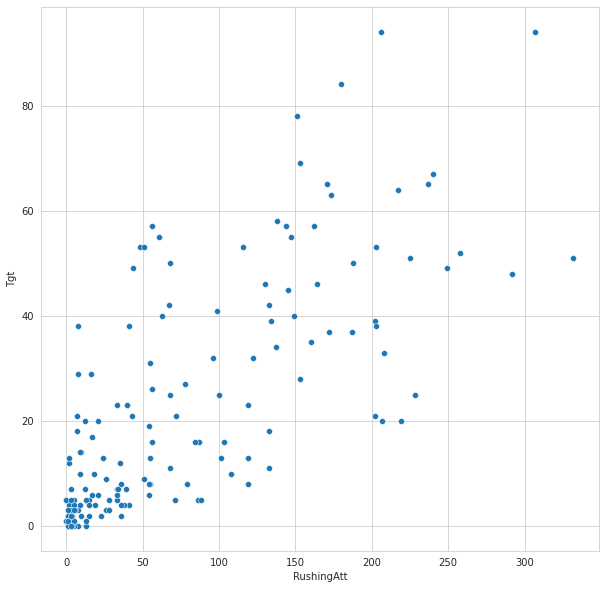

In [17]:
import seaborn as sns
from matplotlib import pyplot as plt

sns.set_style('whitegrid')

plt.figure(figsize=(10, 10))

sns.scatterplot(rb_df['RushingAtt'], rb_df['Tgt']);
#Added a semicolon to prevent text above Scatterplot from appearing upon chart generation.

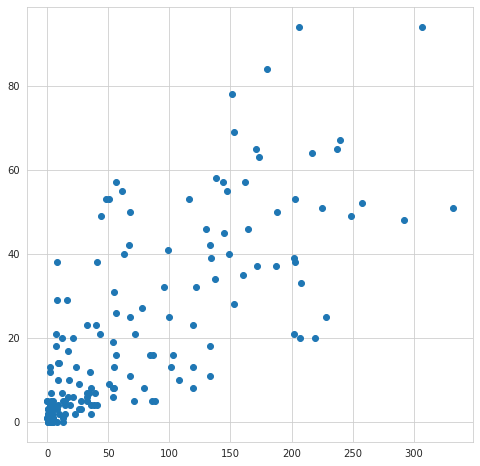

In [19]:
plt.figure(figsize=(8, 8))
plt.scatter(rb_df['RushingAtt'], rb_df['Tgt'])